# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#tirar os avisos
import warnings
warnings.filterwarnings('ignore')

# 

# 

# Pré-processamento dos Dados

#### Leitura inicial do dataset, eliminacao de filas/colunas desnecessárias, separação em 2 dataframes

In [2]:
#ler o dataset
data = pd.read_csv("video_games.csv")

In [3]:
#eliminar colunas não relevantes (id, name, user_score, summary) e ordenar colunas restantes
data = data[['category', 'n_dlcs', 'n_expansions', 'year', 'follows', 'in_franchise', 'genres', 'companies', 'platforms', 'n_user_reviews', 'user_rating']]

In [4]:
#eliminar filas duplicadas
data = data.drop_duplicates()

<AxesSubplot:>

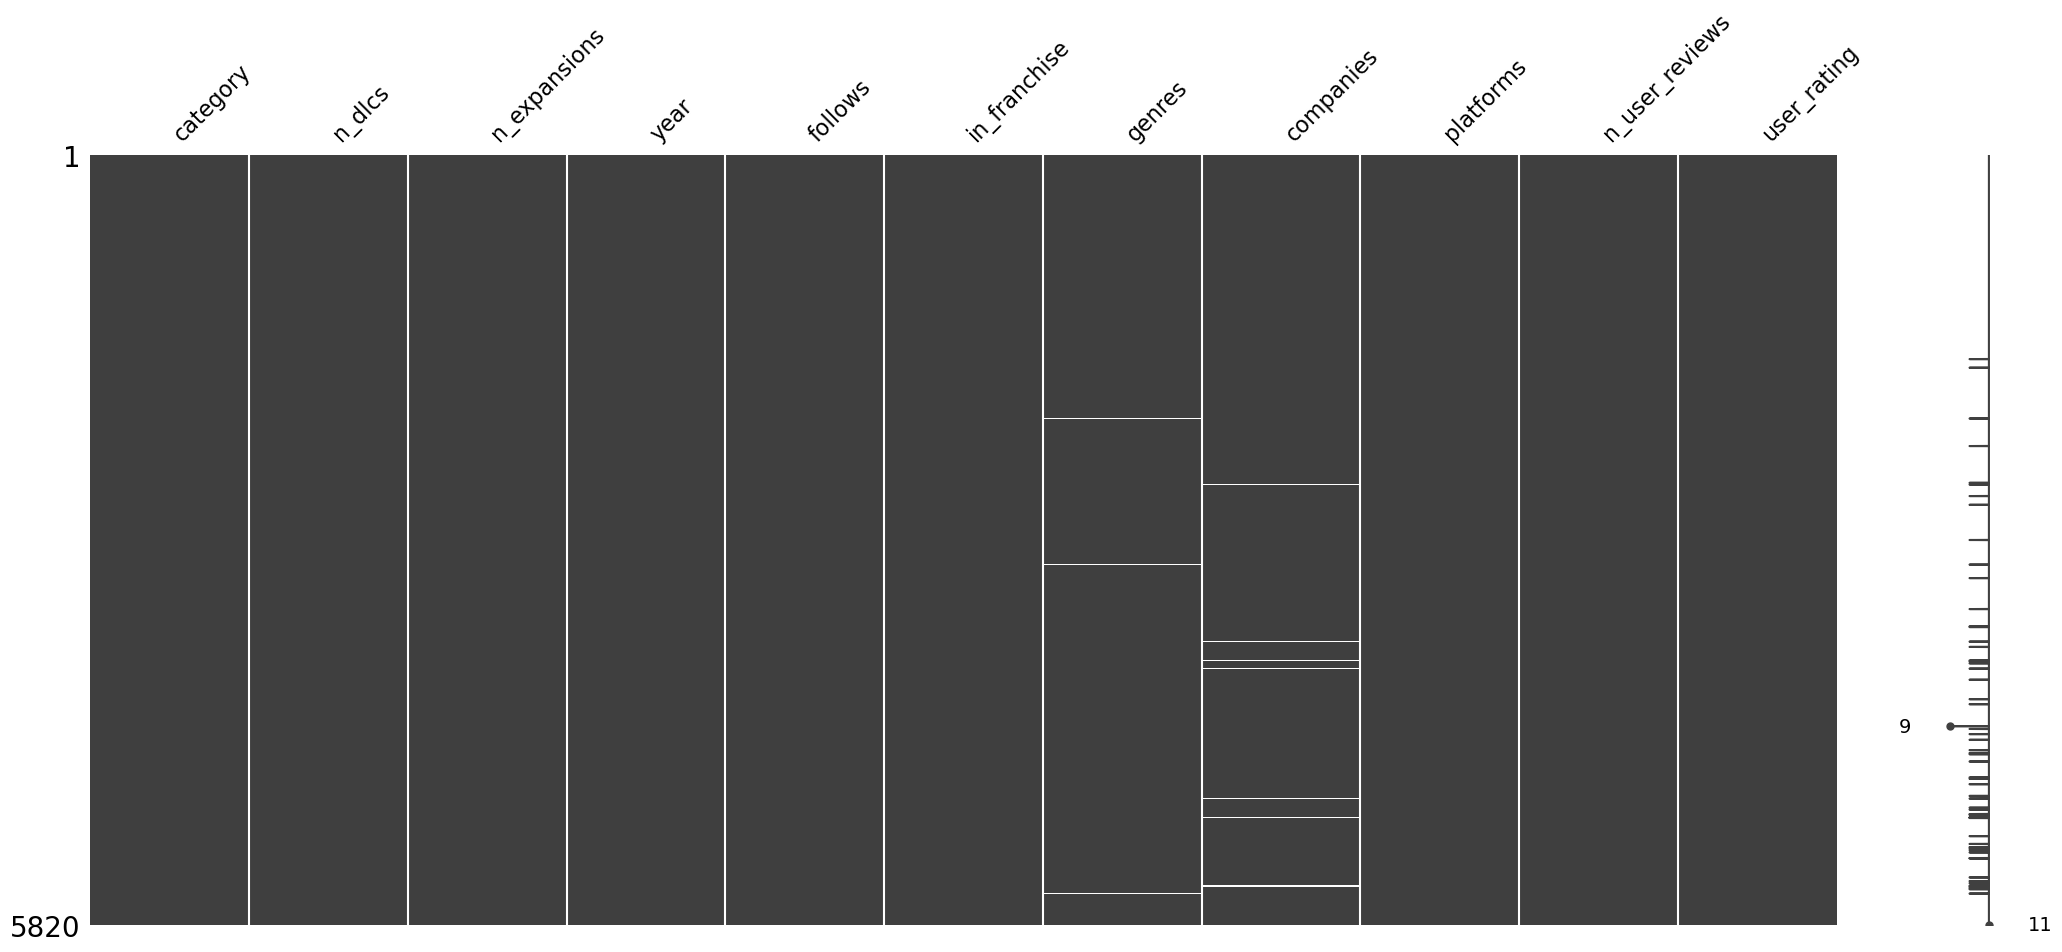

In [5]:
#visualizar filas que têm colunas sem valor
mn.matrix(data)

In [6]:
#uma vez que há poucas filas com valores em falta, podemos eliminar estas sem afetar muito os resultados
data = data.dropna()

In [7]:
#visualização do dataframe inicial
data

,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews,user_rating
0,main_game,0,0,2013,1766,True,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",3369,great
1,main_game,4,2,2015,1516,True,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",2997,great
2,main_game,3,0,2011,1046,False,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",2567,great
3,main_game,3,0,2011,963,True,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",2544,great
4,main_game,0,0,2007,894,True,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",2297,great
...,...,...,...,...,...,...,...,...,...,...,...
5819,main_game,0,0,2005,5,False,"Role-playing (RPG), Strategy, Tactical","Irrational Games, Digital Jesters, Electronic ...",PC (Microsoft Windows),11,great
5820,main_game,0,0,2001,11,False,"Real Time Strategy (RTS), Simulator, Strategy","Strategy First, Paradox Interactive, MacPlay, ...","PC (Microsoft Windows), Mac",11,great
5821,main_game,0,0,2003,1,False,"Simulator, Sport","Eidos Interactive, Sports Interactive","PC (Microsoft Windows), Mac",11,good
5822,expansion,0,0,2006,8,True,"Shooter, Simulator, Strategy, Tactical","Irrational Games, Vivendi Universal, Sierra En...",PC (Microsoft Windows),11,good


# 

#### Transformação das colunas categorical em numerical

In [8]:
le = LabelEncoder()

In [9]:
#user_rating (não é preciso codificar!)
#data['user_rating_n'] = le.fit_transform(data['user_rating'])

In [10]:
#category
data['category'] = le.fit_transform(data['category'])

In [11]:
#in_franchise
data['in_franchise'] = le.fit_transform(data['in_franchise'])

In [12]:
#visualização do dataframe com os dados já codificados
data

,category,n_dlcs,n_expansions,year,follows,in_franchise,genres,companies,platforms,n_user_reviews,user_rating
0,6,0,0,2013,1766,1,"Shooter, Adventure","Rockstar North, Rockstar Games, Take-Two Inter...","PC (Microsoft Windows), PlayStation 3, Xbox 36...",3369,great
1,6,4,2,2015,1516,1,"Role-playing (RPG), Adventure","WB Games, Bandai Namco Entertainment, cdp.pl, ...","PC (Microsoft Windows), PlayStation 4, Xbox On...",2997,great
2,6,3,0,2011,1046,0,"Role-playing (RPG), Adventure","Bethesda Game Studios, Bethesda Softworks","PC (Microsoft Windows), PlayStation 3, Xbox 360",2567,great
3,6,3,0,2011,963,1,"Shooter, Platform, Puzzle, Adventure","Valve Corporation, Electronic Arts","Linux, PC (Microsoft Windows), PlayStation 3, ...",2544,great
4,6,0,0,2007,894,1,"Shooter, Platform, Puzzle","Valve Corporation, EA","Linux, PC (Microsoft Windows), PlayStation 3, ...",2297,great
...,...,...,...,...,...,...,...,...,...,...,...
5819,6,0,0,2005,5,0,"Role-playing (RPG), Strategy, Tactical","Irrational Games, Digital Jesters, Electronic ...",PC (Microsoft Windows),11,great
5820,6,0,0,2001,11,0,"Real Time Strategy (RTS), Simulator, Strategy","Strategy First, Paradox Interactive, MacPlay, ...","PC (Microsoft Windows), Mac",11,great
5821,6,0,0,2003,1,0,"Simulator, Sport","Eidos Interactive, Sports Interactive","PC (Microsoft Windows), Mac",11,good
5822,4,0,0,2006,8,1,"Shooter, Simulator, Strategy, Tactical","Irrational Games, Vivendi Universal, Sierra En...",PC (Microsoft Windows),11,good


# 

#### Separação da coluna 'genres' em colunas dedicadas a cada género

In [13]:
data_genres = data['genres'].str.get_dummies(', ')
data = data.drop(['genres'], axis=1)

In [14]:
#visualização da tabela
data_genres

,Adventure,Arcade,Card & Board Game,Fighting,Hack and slash/Beat 'em up,Indie,MOBA,Music,Pinball,Platform,...,Racing,Real Time Strategy (RTS),Role-playing (RPG),Shooter,Simulator,Sport,Strategy,Tactical,Turn-based strategy (TBS),Visual Novel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5820,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
5821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0


# 

#### Separação da coluna 'companies' em colunas de acordo com o número de jogos lançados por cada empresa

In [15]:
#separação de todas as empresas numa nova tabela
data_companies = data['companies'].str.get_dummies(', ')
data = data.drop(['companies'], axis=1)

In [16]:
#empresas insignificantes (jogos==1)
companies_insignificant = data_companies.loc[:, data_companies.sum(axis=0)==1]
companies_insignificant['companies_insignificant'] = companies_insignificant.sum(axis=1)
companies_insignificant = companies_insignificant['companies_insignificant']

In [17]:
#empresas minúsculas (1<jogos<=5)
companies_miniscule = data_companies.loc[:, data_companies.sum(axis=0)>1]
companies_miniscule = companies_miniscule.loc[:, companies_miniscule.sum(axis=0)<=5]
companies_miniscule['companies_miniscule'] = companies_miniscule.sum(axis=1)
companies_miniscule = companies_miniscule['companies_miniscule']

In [18]:
#empresas pequenas (5<jogos<=10)
companies_little = data_companies.loc[:, data_companies.sum(axis=0)>5]
companies_little = companies_little.loc[:, companies_little.sum(axis=0)<=10]
companies_little['companies_little'] = companies_little.sum(axis=1)
companies_little = companies_little['companies_little']

In [19]:
#empresas médias (10<jogos<=50)
companies_medium = data_companies.loc[:, data_companies.sum(axis=0)>10]
companies_medium = companies_medium.loc[:, companies_medium.sum(axis=0)<=50]
companies_medium['companies_medium'] = companies_medium.sum(axis=1)
companies_medium = companies_medium['companies_medium']

In [20]:
#empresas grandes (50<jogos<=100)
companies_big = data_companies.loc[:, data_companies.sum(axis=0)>50]
companies_big = companies_big.loc[:, companies_big.sum(axis=0)<=100]
companies_big['companies_big'] = companies_big.sum(axis=1)
companies_big = companies_big['companies_big']

In [21]:
#empresas enormes (100<jogos<=200)
companies_huge = data_companies.loc[:, data_companies.sum(axis=0)>100]
companies_huge = companies_huge.loc[:, companies_huge.sum(axis=0)<=200]
companies_huge['companies_huge'] = companies_huge.sum(axis=1)
companies_huge = companies_huge['companies_huge']

In [22]:
#empresas top (jogos>200)
companies_top = data_companies.loc[:, data_companies.sum(axis=0)>200]
companies_top['companies_top'] = companies_top.sum(axis=1)
companies_top = companies_top['companies_top']

In [23]:
#concatenação das novas tabelas numa só
data_companies = pd.concat([companies_insignificant, companies_miniscule, companies_little, companies_medium, companies_big, companies_huge, companies_top], axis='columns')
data_companies

,companies_insignificant,companies_miniscule,companies_little,companies_medium,companies_big,companies_huge,companies_top
0,0,0,0,2,1,0,0
1,0,2,0,2,2,0,0
2,0,0,0,1,1,0,0
3,0,0,0,1,0,0,1
4,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...
5819,0,1,1,0,0,0,1
5820,0,1,0,3,0,0,0
5821,0,0,0,1,1,0,0
5822,0,0,2,0,1,0,0


# 

#### Separação da coluna 'platforms' em colunas de acordo com o número de jogos para cada plataforma

In [24]:
#separação de todas as plataformas numa nova tabela
data_platforms = data['platforms'].str.get_dummies(', ')
data = data.drop(['platforms'], axis=1)

In [25]:
#plataformas insignificantes (jogos==1)
platforms_insignificant = data_platforms.loc[:, data_platforms.sum(axis=0)==1]
platforms_insignificant['platforms_insignificant'] = platforms_insignificant.sum(axis=1)
platforms_insignificant = platforms_insignificant['platforms_insignificant']

In [26]:
#plataformas minusculas (1<jogos<=10)
platforms_miniscule = data_platforms.loc[:, data_platforms.sum(axis=0)>1]
platforms_miniscule = platforms_miniscule.loc[:, platforms_miniscule.sum(axis=0)<=10]
platforms_miniscule['platforms_miniscule'] = platforms_miniscule.sum(axis=1)
platforms_miniscule = platforms_miniscule['platforms_miniscule']

In [27]:
#plataformas pequenas (10<jogos<=50)
platforms_little = data_platforms.loc[:, data_platforms.sum(axis=0)>10]
platforms_little = platforms_little.loc[:, platforms_little.sum(axis=0)<=50]
platforms_little['platforms_little'] = platforms_little.sum(axis=1)
platforms_little = platforms_little['platforms_little']

In [28]:
#plataformas médias (50<jogos<=100)
platforms_medium = data_platforms.loc[:, data_platforms.sum(axis=0)>50]
platforms_medium = platforms_medium.loc[:, platforms_medium.sum(axis=0)<=100]
platforms_medium['platforms_medium'] = platforms_medium.sum(axis=1)
platforms_medium = platforms_medium['platforms_medium']

In [29]:
#plataformas grandes (100<jogos<=300)
platforms_big = data_platforms.loc[:, data_platforms.sum(axis=0)>100]
platforms_big = platforms_big.loc[:, platforms_big.sum(axis=0)<=300]
platforms_big['platforms_big'] = platforms_big.sum(axis=1)
platforms_big = platforms_big['platforms_big']

In [30]:
#plataformas enormes (300<jogos<=750)
platforms_huge = data_platforms.loc[:, data_platforms.sum(axis=0)>300]
platforms_huge = platforms_huge.loc[:, platforms_huge.sum(axis=0)<=750]
platforms_huge['platforms_huge'] = platforms_huge.sum(axis=1)
platforms_huge = platforms_huge['platforms_huge']

In [31]:
#plataformas top (jogos>750)
platforms_top = data_platforms.loc[:, data_platforms.sum(axis=0)>750]
platforms_top['platforms_top'] = platforms_top.sum(axis=1)
platforms_top = platforms_top['platforms_top']

In [32]:
#concatenação das novas tabelas numa só
data_platforms = pd.concat([platforms_insignificant, platforms_miniscule, platforms_little, platforms_medium, platforms_big, platforms_huge, platforms_top], axis='columns')
data_platforms

,platforms_insignificant,platforms_miniscule,platforms_little,platforms_medium,platforms_big,platforms_huge,platforms_top
0,0,0,0,0,2,0,5
1,0,0,0,0,0,0,4
2,0,0,0,0,0,0,3
3,0,0,0,0,0,0,5
4,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...
5819,0,0,0,0,0,0,1
5820,0,0,0,0,0,0,2
5821,0,0,0,0,0,0,2
5822,0,0,0,0,0,0,1


# 

#### Organização do DataFrame principal

In [33]:
#separação da coluna 'user_rating', para mais tarde a colocar em último lugar (facilita a leitura mais tarde)
user_rating = data["user_rating"]
data = data.drop(['user_rating'], axis=1)

In [34]:
#concatenação de todas as tabelas no dataframe data
data = pd.concat([data, data_companies], axis='columns')
data = pd.concat([data, data_platforms], axis='columns')
data = pd.concat([data, data_genres], axis='columns')
data = pd.concat([data, user_rating], axis='columns')

In [35]:
#visualização final do dataframe data
data

,category,n_dlcs,n_expansions,year,follows,in_franchise,n_user_reviews,companies_insignificant,companies_miniscule,companies_little,...,Real Time Strategy (RTS),Role-playing (RPG),Shooter,Simulator,Sport,Strategy,Tactical,Turn-based strategy (TBS),Visual Novel,user_rating
0,6,0,0,2013,1766,1,3369,0,0,0,...,0,0,1,0,0,0,0,0,0,great
1,6,4,2,2015,1516,1,2997,0,2,0,...,0,1,0,0,0,0,0,0,0,great
2,6,3,0,2011,1046,0,2567,0,0,0,...,0,1,0,0,0,0,0,0,0,great
3,6,3,0,2011,963,1,2544,0,0,0,...,0,0,1,0,0,0,0,0,0,great
4,6,0,0,2007,894,1,2297,0,1,0,...,0,0,1,0,0,0,0,0,0,great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,6,0,0,2005,5,0,11,0,1,1,...,0,1,0,0,0,1,1,0,0,great
5820,6,0,0,2001,11,0,11,0,1,0,...,1,0,0,1,0,1,0,0,0,great
5821,6,0,0,2003,1,0,11,0,0,0,...,0,0,0,1,1,0,0,0,0,good
5822,4,0,0,2006,8,1,11,0,0,2,...,0,0,1,1,0,1,1,0,0,good


# 

# 

# Análise dos Dados (para a apresentação)

#### Relacionando número de reviews e seguidores

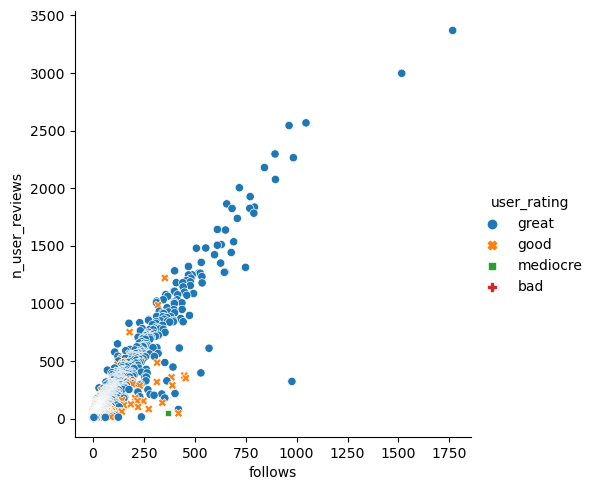

In [36]:
#desenho do plot
sns.relplot(x = "follows", y="n_user_reviews", hue = "user_rating",  style = "user_rating", data = data);

# 

#### De acordo com a dimensão da empresa

In [37]:
#obtenção dos dados desejados (total de jogos com certo rating e certa dimensao da empresa)

badcins = len(data[(data['user_rating']=='bad') & (data['companies_insignificant']>=1)])
medcins = len(data[(data['user_rating']=='mediocre') & (data['companies_insignificant']>=1)])
goodcins = len(data[(data['user_rating']=='good') & (data['companies_insignificant']>=1)])
greatcins = len(data[(data['user_rating']=='great') & (data['companies_insignificant']>=1)])

badcmin = len(data[(data['user_rating']=='bad') & (data['companies_miniscule']>=1)])
medcmin = len(data[(data['user_rating']=='mediocre') & (data['companies_miniscule']>=1)])
goodcmin = len(data[(data['user_rating']=='good') & (data['companies_miniscule']>=1)])
greatcmin = len(data[(data['user_rating']=='great') & (data['companies_miniscule']>=1)])

badclit = len(data[(data['user_rating']=='bad') & (data['companies_little']>=1)])
medclit = len(data[(data['user_rating']=='mediocre') & (data['companies_little']>=1)])
goodclit = len(data[(data['user_rating']=='good') & (data['companies_little']>=1)])
greatclit = len(data[(data['user_rating']=='great') & (data['companies_little']>=1)])

badcmed = len(data[(data['user_rating']=='bad') & (data['companies_medium']>=1)])
medcmed = len(data[(data['user_rating']=='mediocre') & (data['companies_medium']>=1)])
goodcmed = len(data[(data['user_rating']=='good') & (data['companies_medium']>=1)])
greatcmed = len(data[(data['user_rating']=='great') & (data['companies_medium']>=1)])

badcbig = len(data[(data['user_rating']=='bad') & (data['companies_big']>=1)])
medcbig = len(data[(data['user_rating']=='mediocre') & (data['companies_big']>=1)])
goodcbig = len(data[(data['user_rating']=='good') & (data['companies_big']>=1)])
greatcbig = len(data[(data['user_rating']=='great') & (data['companies_big']>=1)])

badchug = len(data[(data['user_rating']=='bad') & (data['companies_huge']>=1)])
medchug = len(data[(data['user_rating']=='mediocre') & (data['companies_huge']>=1)])
goodchug = len(data[(data['user_rating']=='good') & (data['companies_huge']>=1)])
greatchug = len(data[(data['user_rating']=='great') & (data['companies_huge']>=1)])

badctop = len(data[(data['user_rating']=='bad') & (data['companies_top']>=1)])
medctop = len(data[(data['user_rating']=='mediocre') & (data['companies_top']>=1)])
goodctop = len(data[(data['user_rating']=='good') & (data['companies_top']>=1)])
greatctop = len(data[(data['user_rating']=='great') & (data['companies_top']>=1)])

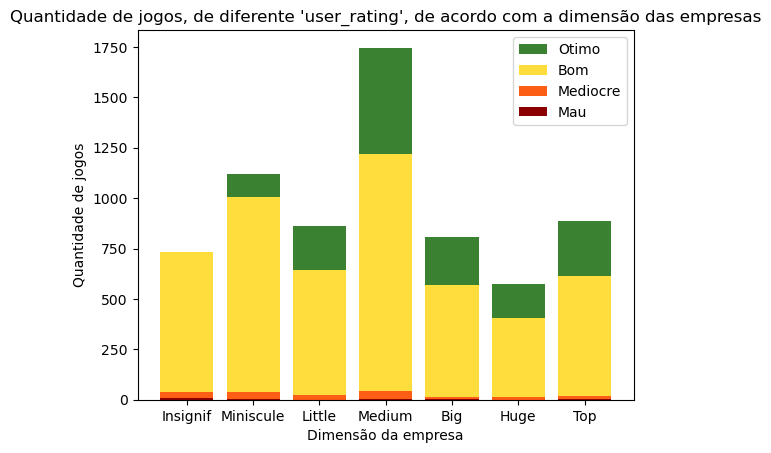

In [38]:
#desenho do plot
empresas = ['Insignif', 'Miniscule', 'Little', 'Medium', 'Big', 'Huge', 'Top']

cratingmau = [badcins, badcmin, badclit, badcmed, badcbig, badchug, badctop]
cratingmediocre = [medcins, medcmin, medclit, medcmed, medcbig, medchug, medctop]
cratingbom = [goodcins, goodcmin, goodclit, goodcmed, goodcbig, goodchug, goodctop]
cratingotimo = [greatcins, greatcmin, greatclit, greatcmed, greatcbig, greatchug, greatctop]


plt.bar(empresas, cratingotimo, color='#3B8132', label="Otimo")
plt.bar(empresas, cratingbom, color='#FFDD3C', label="Bom")
plt.bar(empresas, cratingmediocre, color='#FD5E16', label="Mediocre")
plt.bar(empresas, cratingmau, color='#8B0000', label="Mau")


plt.legend(loc='best')
plt.title("Quantidade de jogos, de diferente 'user_rating', de acordo com a dimensão das empresas")
plt.xlabel("Dimensão da empresa")
plt.ylabel("Quantidade de jogos")
plt.show()

#FALAR DE PROPORCOES, NAO DE QUANTIDADE!

# 

#### De acordo com a dimensão da plataforma

In [39]:
#obtenção dos dados desejados (total de jogos com certo rating e certa dimensao da plataforma)
badpins = len(data[(data['user_rating']=='bad') & (data['platforms_miniscule']>=1)])
medpins = len(data[(data['user_rating']=='mediocre') & (data['platforms_miniscule']>=1)])
goodpins = len(data[(data['user_rating']=='good') & (data['platforms_miniscule']>=1)])
greatpins = len(data[(data['user_rating']=='great') & (data['platforms_miniscule']>=1)])

badpmin = len(data[(data['user_rating']=='bad') & (data['platforms_miniscule']>=1)])
medpmin = len(data[(data['user_rating']=='mediocre') & (data['platforms_miniscule']>=1)])
goodpmin = len(data[(data['user_rating']=='good') & (data['platforms_miniscule']>=1)])
greatpmin = len(data[(data['user_rating']=='great') & (data['platforms_miniscule']>=1)])

badplit = len(data[(data['user_rating']=='bad') & (data['platforms_little']>=1)])
medplit = len(data[(data['user_rating']=='mediocre') & (data['platforms_little']>=1)])
goodplit = len(data[(data['user_rating']=='good') & (data['platforms_little']>=1)])
greatplit = len(data[(data['user_rating']=='great') & (data['platforms_little']>=1)])

badpmed = len(data[(data['user_rating']=='bad') & (data['platforms_medium']>=1)])
medpmed = len(data[(data['user_rating']=='mediocre') & (data['platforms_medium']>=1)])
goodpmed = len(data[(data['user_rating']=='good') & (data['platforms_medium']>=1)])
greatpmed = len(data[(data['user_rating']=='great') & (data['platforms_medium']>=1)])

badpbig = len(data[(data['user_rating']=='bad') & (data['platforms_big']>=1)])
medpbig = len(data[(data['user_rating']=='mediocre') & (data['platforms_big']>=1)])
goodpbig = len(data[(data['user_rating']=='good') & (data['platforms_big']>=1)])
greatpbig = len(data[(data['user_rating']=='great') & (data['platforms_big']>=1)])

badphug = len(data[(data['user_rating']=='bad') & (data['platforms_huge']>=1)])
medphug = len(data[(data['user_rating']=='mediocre') & (data['platforms_huge']>=1)])
goodphug = len(data[(data['user_rating']=='good') & (data['platforms_huge']>=1)])
greatphug = len(data[(data['user_rating']=='great') & (data['platforms_huge']>=1)])

badptop = len(data[(data['user_rating']=='bad') & (data['platforms_top']>=1)])
medptop = len(data[(data['user_rating']=='mediocre') & (data['platforms_top']>=1)])
goodptop = len(data[(data['user_rating']=='good') & (data['platforms_top']>=1)])
greatptop = len(data[(data['user_rating']=='great') & (data['platforms_top']>=1)])

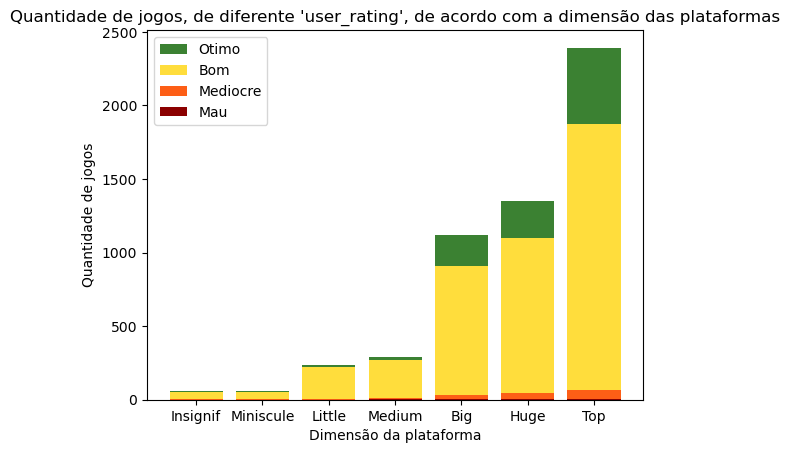

In [40]:
#desenho do plot
plataformas = ['Insignif', 'Miniscule', 'Little', 'Medium', 'Big', 'Huge', 'Top']

pratingmau = [badpins, badpmin, badplit, badpmed, badpbig, badphug, badptop]
pratingmediocre = [medpins, medpmin, medplit, medpmed, medpbig, medphug, medptop]
pratingbom = [goodpins, goodpmin, goodplit, goodpmed, goodpbig, goodphug, goodptop]
pratingotimo = [greatpins, greatpmin, greatplit, greatpmed, greatpbig, greatphug, greatptop]


plt.bar(plataformas, pratingotimo, color='#3B8132', label="Otimo")
plt.bar(plataformas, pratingbom, color='#FFDD3C', label="Bom")
plt.bar(plataformas, pratingmediocre, color='#FD5E16', label="Mediocre")
plt.bar(plataformas, pratingmau, color='#8B0000', label="Mau")


plt.legend(loc='best')
plt.title("Quantidade de jogos, de diferente 'user_rating', de acordo com a dimensão das plataformas")
plt.xlabel("Dimensão da plataforma")
plt.ylabel("Quantidade de jogos")
plt.show()

#FALAR DE PROPORCOES, NAO DE QUANTIDADE!

# 

# 

# Separação dos Dados

In [41]:
#X é a tabela de variáveis independentes e Xlist é a lista dos valores da tabela
X = data.iloc[:, :-1]
Xlist = list(X.itertuples(index=False, name=None))

In [42]:
#Y é a tabela de variáveis dependentes e Ylist é a lista dos valores da tabela
Y = data.iloc[:, 44]
Ylist = Y.tolist()

In [43]:
#separação em set de treino e set de teste
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(Xlist, Ylist, test_size=0.33)

# 

# 

# Decision Trees

In [44]:
#atribuição do modelo e treino do mesmo
modeltree = DecisionTreeClassifier(max_leaf_nodes = 73, random_state=0, criterion="gini")
modeltree.fit(X_train, Y_train)
predictedtree = modeltree.predict(X_test)

In [45]:
#comparação do resultado previsto e do resultado real
for x in range(len(predictedtree)):
    print("Predicted:", predictedtree[x], 'Actual:', Y_test[x])

Predicted: good Actual: good
Predicted: good Actual: great
Predicted: great Actual: good
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: mediocre
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: great
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: good Actual: great
Predicted: good Actual: good
Predicted: good Actual: great
Predicted: good Actual: good
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: great Actual: good
Predicted: good Actual: great
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Pred

In [46]:
accuracy_score(Y_test, predictedtree)

0.6368421052631579

# 

# 

# K-Nearest Neighbors

In [47]:
#scaling dos dados (pois knn é baseado em distâncias)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [48]:
#atribuição do modelo e treino do mesmo
modelknn = KNeighborsClassifier(n_neighbors=51)
modelknn.fit(X_train, Y_train)
predictedknn = modelknn.predict(X_test)

In [49]:
#comparação do resultado previsto e do resultado real
for x in range(len(predictedknn)):
    print("Predicted:", predictedknn[x], 'Actual:', Y_test[x])

Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: mediocre
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: good Actual: great
Predicted: good Actual: good
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: great Actual: good
Predicted: good Actual: great
Predicted: good Actual: great
Predicted: good Actual: great
Predicted: great Actual: good
Pr

In [50]:
accuracy_score(Y_test, predictedknn)

0.6247368421052631

# 

# 

# Comparação dos Algoritmos

#### Decision Trees

In [51]:
#confusion matrix do modelo Decision Trees
cmtree = confusion_matrix(Y_test, predictedtree)
cmtree

array([[  0,   3,   0,   0],
       [  0, 577, 241,   0],
       [  0, 406, 633,   0],
       [  0,  32,   8,   0]])

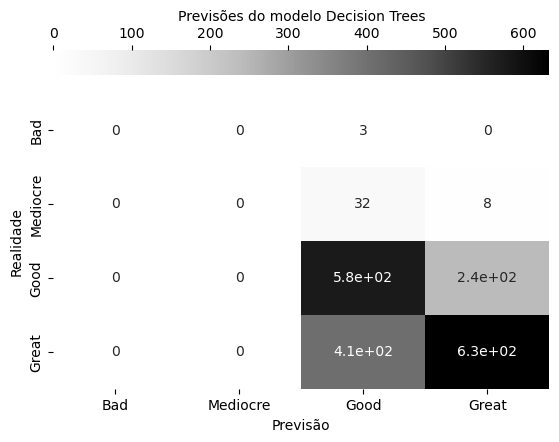


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         3
        good       0.57      0.71      0.63       818
       great       0.72      0.61      0.66      1039
    mediocre       0.00      0.00      0.00        40

    accuracy                           0.64      1900
   macro avg       0.32      0.33      0.32      1900
weighted avg       0.64      0.64      0.63      1900


Accuracy:  0.6368421052631579


In [52]:
#reorganização do confusion matrix visto acima, pois o encoding nao fica ordenado, isto é: 0=bad, 1=good, 2=great, 3=mediocre.
cmtree2 = [[cmtree[0,0], cmtree[0,3], cmtree[0,1], cmtree[0,2]],
           [cmtree[3,0], cmtree[3,3], cmtree[3,1], cmtree[3,2]],
           [cmtree[1,0], cmtree[1,3], cmtree[1,1], cmtree[1,2]],
           [cmtree[2,0], cmtree[2,3], cmtree[2,1], cmtree[2,2]]]

ratingprevisto = ['Bad', 'Mediocre', 'Good', 'Great']

sns.heatmap(cmtree2,
            cmap='Greys',
            annot=True,
            cbar_kws={"location":"top", "label":"Previsões do modelo Decision Trees"},
            xticklabels=ratingprevisto,
            yticklabels=ratingprevisto)

plt.xlabel("Previsão")
plt.ylabel("Realidade")

plt.show()

print()
print(classification_report(Y_test, predictedtree))
print()
print('Accuracy: ', accuracy_score(Y_test, predictedtree))

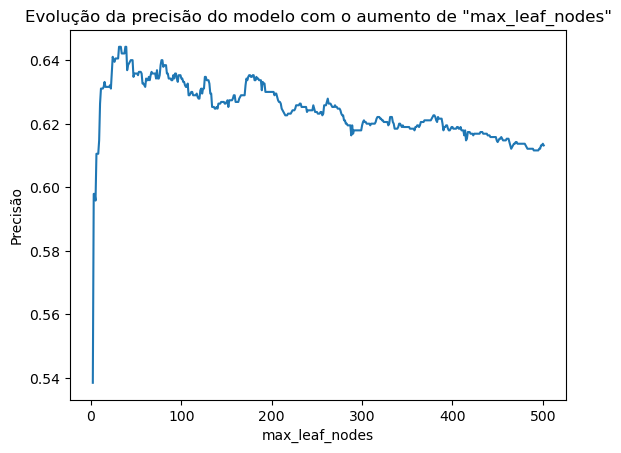

In [53]:
#evolução da precisão do modelo com o aumento do 'max_leaf_nodes'
numerostree = [0]*500
valoresnodes = [0]*500

for i in range(500):
    modeltree = DecisionTreeClassifier(max_leaf_nodes = i+2, random_state=0, criterion="gini")
    modeltree.fit(X_train, Y_train)
    predictedtree = modeltree.predict(X_test)
    valoresnodes[i]= accuracy_score(Y_test, predictedtree)
    numerostree[i] = i+2
    
plt.plot(numerostree, valoresnodes)
plt.xlabel('max_leaf_nodes')
plt.ylabel('Precisão')
plt.title('Evolução da precisão do modelo com o aumento de "max_leaf_nodes"')
plt.show()

# 

#### K-NN

In [54]:
#confusion matrix do modelo KNN
cmknn = confusion_matrix(Y_test, predictedknn)
cmknn

array([[  0,   3,   0,   0],
       [  0, 525, 293,   0],
       [  0, 377, 662,   0],
       [  0,  31,   9,   0]])

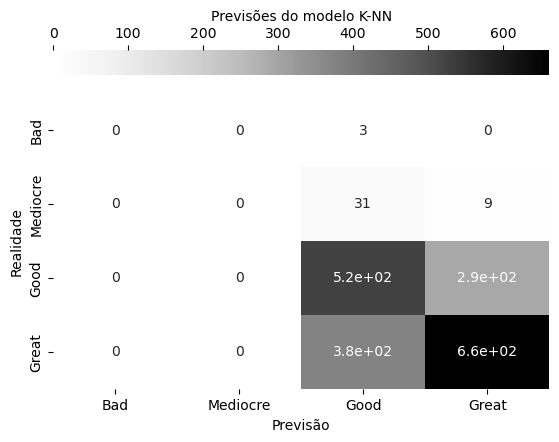


              precision    recall  f1-score   support

         bad       0.00      0.00      0.00         3
        good       0.56      0.64      0.60       818
       great       0.69      0.64      0.66      1039
    mediocre       0.00      0.00      0.00        40

    accuracy                           0.62      1900
   macro avg       0.31      0.32      0.31      1900
weighted avg       0.62      0.62      0.62      1900


Accuracy:  0.6247368421052631


In [55]:
#reorganização do confusion matrix visto acima, pois o encoding nao fica ordenado, isto é: 0=bad, 1=good, 2=great, 3=mediocre.
cmknn2 = [[cmknn[0,0], cmknn[0,3], cmknn[0,1], cmknn[0,2]],
          [cmknn[3,0], cmknn[3,3], cmknn[3,1], cmknn[3,2]],
          [cmknn[1,0], cmknn[1,3], cmknn[1,1], cmknn[1,2]],
          [cmknn[2,0], cmknn[2,3], cmknn[2,1], cmknn[2,2]]]

ratingprevisto = ['Bad', 'Mediocre', 'Good', 'Great']

sns.heatmap(cmknn2,
            cmap='Greys',
            annot=True,
            cbar_kws={"location":"top", "label":"Previsões do modelo K-NN"},
            xticklabels=ratingprevisto,
            yticklabels=ratingprevisto)

plt.xlabel("Previsão")
plt.ylabel("Realidade")

plt.show()

print()
print(classification_report(Y_test, predictedknn))
print()
print('Accuracy: ', accuracy_score(Y_test, predictedknn))

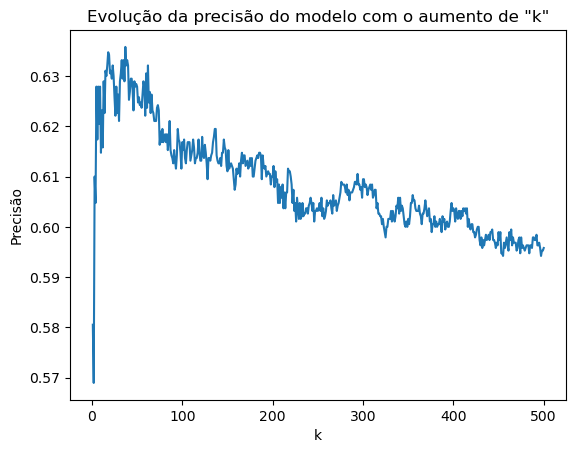

In [56]:
#evolução da precisão do modelo com o aumento do "k"
numerosknn = [0]*500
valoresk = [0]*500

for i in range(500):
    modelknn = KNeighborsClassifier(n_neighbors=i+1)
    modelknn.fit(X_train, Y_train)
    predictedknn = modelknn.predict(X_test)
    valoresk[i]= accuracy_score(Y_test, predictedknn)
    numerosknn[i] = i+1
    
plt.plot(numerosknn, valoresk)
plt.xlabel('k')
plt.ylabel('Precisão')
plt.title('Evolução da precisão do modelo com o aumento de "k"')
plt.show()

# 

# 

# Extra (testes)

#### Implementação do algoritmo Gaussian Naive Bayes

In [57]:
#atribuição do modelo e treino do mesmo
modelgnb = GaussianNB()
modelgnb.fit(X_train,Y_train)
predictedgnb = modelgnb.predict(X_test)

In [58]:
#comparação do resultado previsto e do resultado real
for x in range(len(predictedgnb)):
    print("Predicted:", predictedgnb[x], 'Actual:', Y_test[x])

Predicted: mediocre Actual: good
Predicted: mediocre Actual: great
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: great Actual: great
Predicted: mediocre Actual: great
Predicted: great Actual: great
Predicted: bad Actual: mediocre
Predicted: mediocre Actual: great
Predicted: great Actual: great
Predicted: mediocre Actual: great
Predicted: mediocre Actual: great
Predicted: mediocre Actual: great
Predicted: good Actual: good
Predicted: good Actual: great
Predicted: good Actual: great
Predicted: great Actual: great
Predicted: mediocre Actual: good
Predicted: great Actual: great
Predicted: mediocre Actual: good
Predicted: great Actual: great
Predicted: mediocre Actual: good
Predicted: mediocre Actual: great
Predicted: bad Actual: good
Predicted: bad Actual: great
Predicted: mediocre Actual: great
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: good Actual: good
Predicted: bad Actual: great
Predicted: bad Actual: great
Predicted: good Actual: great

In [59]:
accuracy_score(Y_test, predictedgnb)

0.24947368421052632

# 

#### Implementação do modelo Support Vector Classification

In [60]:
#atribuição do modelo e treino do mesmo
modelsvc = SVC()
modelsvc.fit(X_train,Y_train)
predictedsvc = modelsvc.predict(X_test)

In [61]:
#comparação do resultado previsto e do resultado real
for x in range(len(predictedsvc)):
    print("Predicted:", predictedsvc[x], 'Actual:', Y_test[x])

Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: mediocre
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: good
Predicted: great Actual: good
Predicted: great Actual: good
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great Actual: great
Predicted: great

In [62]:
accuracy_score(Y_test, predictedsvc)

0.5468421052631579